# LSF Fitting


In [193]:
from pylab import *
import numpy as np
from astropy.modeling import models, fitting


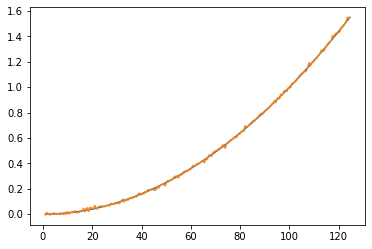

In [194]:
plot(x,y)
plot(x,yr)

<ipython-input-249-b3cf06206a5a>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot(*fr,i)


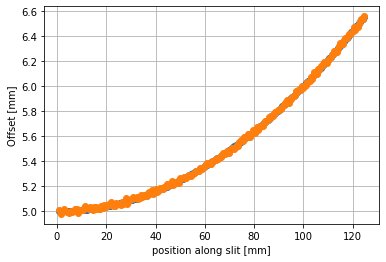

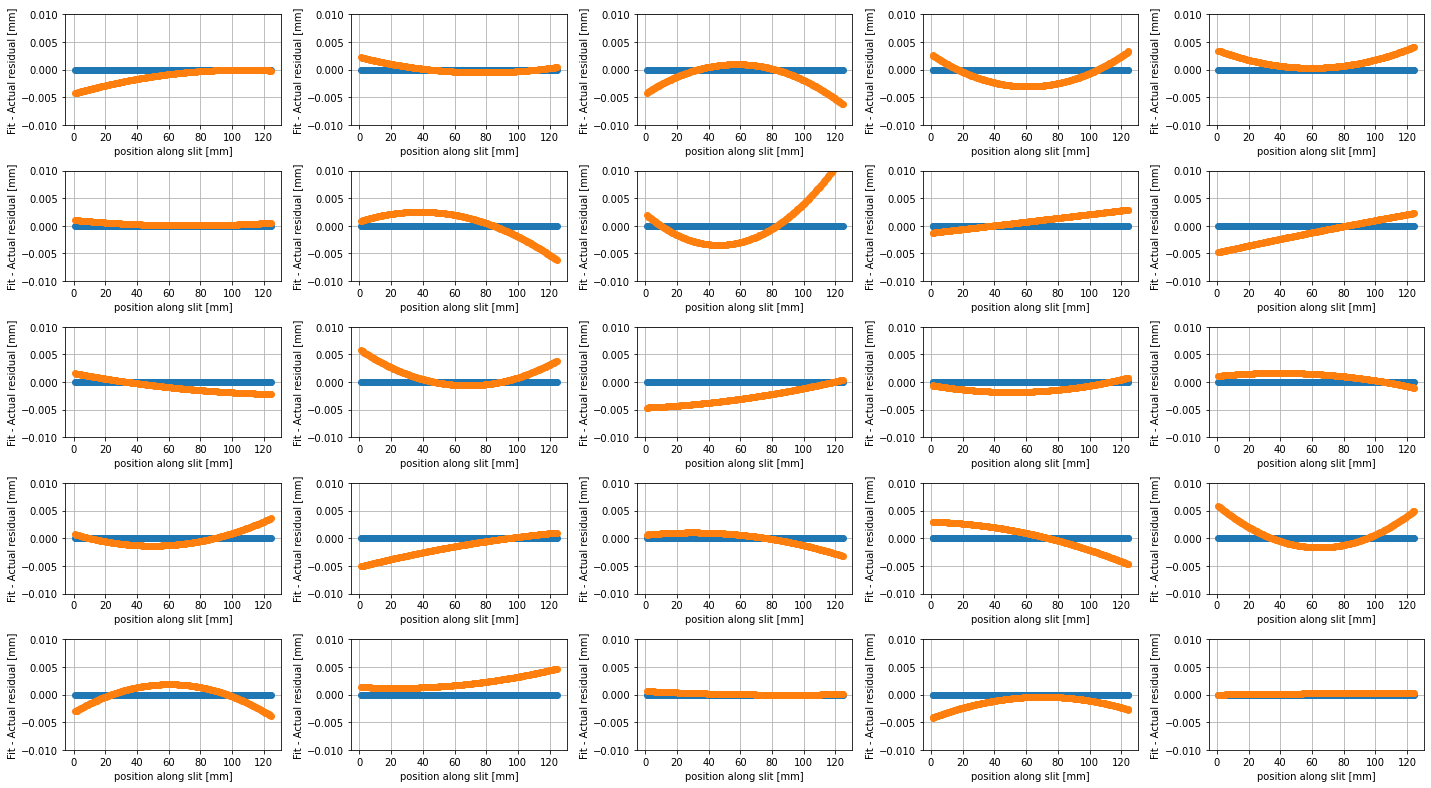

In [249]:
x = np.arange(1,125,0.5)
y = (x/100)**2+5
yr = y + np.random.randn(len(x))*0.010

plot(x,y,'o')
plot(x,yr,'o')
grid(True)
xlabel("position along slit [mm]")
ylabel("Offset [mm]")


model = models.Polynomial1D(degree=2)
fitter = fitting.LevMarLSQFitter()

bf1 = fitter(model, x, y)
#print(bf1)
#print(bf2)
#ff = np.poly1d(np.polyfit(x,y,2))
#rrn = np.poly1d(np.polyfit(x,yr,2))

figure(figsize=(20,11))
fr = (5,5)
subplot(*fr,1)

for i in range(1,fr[0]*fr[1]+1):
    yr = y + np.random.randn(len(x))*0.018
    bf2 = fitter(model, x, yr)

    subplot(*fr,i)
    plot(x,y-bf1(x),'o')
    plot(x,y-bf2(x),'o')
    ylim(-.01,.01)
    xlabel("position along slit [mm]")
    ylabel("Fit - Actual residual [mm]")
    grid(True)
    
tight_layout()

# focal length

In [235]:
d_height = 15
slit_height = 125
dist = 1000

f = d_height/slit_height * dist

# depth of field

In [240]:

eps = 200

bfd = 1/(1/f-1/dist) 
bfd_eps = 1/(1/f - 1/(dist-eps))

In [241]:
bfd-bfd_eps

-4.81283422459893